In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MODEL='VGG19'
detail_file = 'results_details_{}.csv'.format(MODEL)
file = 'results_{}.csv'.format(MODEL)

detailed_results = pd.read_csv(detail_file, sep='|')
classes = {}
labels = []

for index, row in detailed_results.iterrows():
  row["Filename"] = row["Filename"].split('-', 1)[1]
  row["Filename"] = row["Filename"].split('\\')[0]
  if not row["Filename"] in classes: 
    classes[row["Filename"]] = {}
    labels.append(row["Filename"])
  row["Predictions"] = row["Predictions"].split('-', 1)[1]
  

In [75]:
detailed_results.head()

,Filename,Predictions
0,Chihuahua,Chihuahua
1,Chihuahua,toy_terrier
2,Chihuahua,malinois
3,Chihuahua,Ibizan_hound
4,Chihuahua,Pembroke


In [0]:
prev = ''

for index, row in detailed_results.iterrows():
  try:
    classes[row["Filename"]][row["Predictions"]] +=1
  except: 
    classes[row["Filename"]][row["Predictions"]] = 1

In [0]:
plot_data = {}
labels.sort()

for key in classes:
  for label in labels:
    if not label in classes[key]:
      classes[key][label] = 0

In [78]:
classes

{'Afghan_hound': {'Afghan_hound': 18,
  'African_hunting_dog': 0,
  'Airedale': 1,
  'American_Staffordshire_terrier': 1,
  'Appenzeller': 0,
  'Australian_terrier': 0,
  'Bedlington_terrier': 0,
  'Bernese_mountain_dog': 0,
  'Blenheim_spaniel': 0,
  'Border_collie': 0,
  'Border_terrier': 0,
  'Boston_bull': 0,
  'Bouvier_des_Flandres': 0,
  'Brabancon_griffon': 0,
  'Brittany_spaniel': 1,
  'Cardigan': 0,
  'Chesapeake_Bay_retriever': 0,
  'Chihuahua': 0,
  'Dandie_Dinmont': 0,
  'Doberman': 0,
  'English_foxhound': 1,
  'English_setter': 1,
  'English_springer': 0,
  'EntleBucher': 0,
  'Eskimo_dog': 0,
  'French_bulldog': 0,
  'German_shepherd': 0,
  'German_short-haired_pointer': 0,
  'Gordon_setter': 0,
  'Great_Dane': 0,
  'Great_Pyrenees': 0,
  'Greater_Swiss_Mountain_dog': 0,
  'Ibizan_hound': 0,
  'Irish_setter': 0,
  'Irish_terrier': 0,
  'Irish_water_spaniel': 0,
  'Irish_wolfhound': 0,
  'Italian_greyhound': 0,
  'Japanese_spaniel': 0,
  'Kerry_blue_terrier': 0,
  'Labrad

In [79]:
df = pd.DataFrame.from_dict(classes)
df = df.dropna()
df = df.reindex(sorted(df.columns), axis=1)
df

,Afghan_hound,African_hunting_dog,Airedale,American_Staffordshire_terrier,Appenzeller,Australian_terrier,Bedlington_terrier,Bernese_mountain_dog,Blenheim_spaniel,Border_collie,Border_terrier,Boston_bull,Bouvier_des_Flandres,Brabancon_griffon,Brittany_spaniel,Cardigan,Chesapeake_Bay_retriever,Chihuahua,Dandie_Dinmont,Doberman,English_foxhound,English_setter,English_springer,EntleBucher,Eskimo_dog,French_bulldog,German_shepherd,German_short-haired_pointer,Gordon_setter,Great_Dane,Great_Pyrenees,Greater_Swiss_Mountain_dog,Ibizan_hound,Irish_setter,Irish_terrier,Irish_water_spaniel,Irish_wolfhound,Italian_greyhound,Japanese_spaniel,Kerry_blue_terrier,...,bluetick,borzoi,boxer,briard,bull_mastiff,cairn,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dhole,dingo,flat-coated_retriever,giant_schnauzer,golden_retriever,groenendael,keeshond,kelpie,komondor,kuvasz,malamute,malinois,miniature_pinscher,miniature_poodle,miniature_schnauzer,otterhound,papillon,pug,redbone,schipperke,silky_terrier,soft-coated_wheaten_terrier,standard_poodle,standard_schnauzer,toy_poodle,toy_terrier,vizsla,whippet,wire-haired_fox_terrier
Afghan_hound,18,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,...,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
African_hunting_dog,0,16,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,...,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
Airedale,1,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
American_Staffordshire_terrier,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Appenzeller,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australian_terrier,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
Bedlington_terrier,0,0,0,0,0,0,12,0,0,0,1,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
Bernese_mountain_dog,0,0,0,0,1,2,0,11,0,2,0,2,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,2,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0
Blenheim_spaniel,0,0,0,0,0,0,0,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Border_collie,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


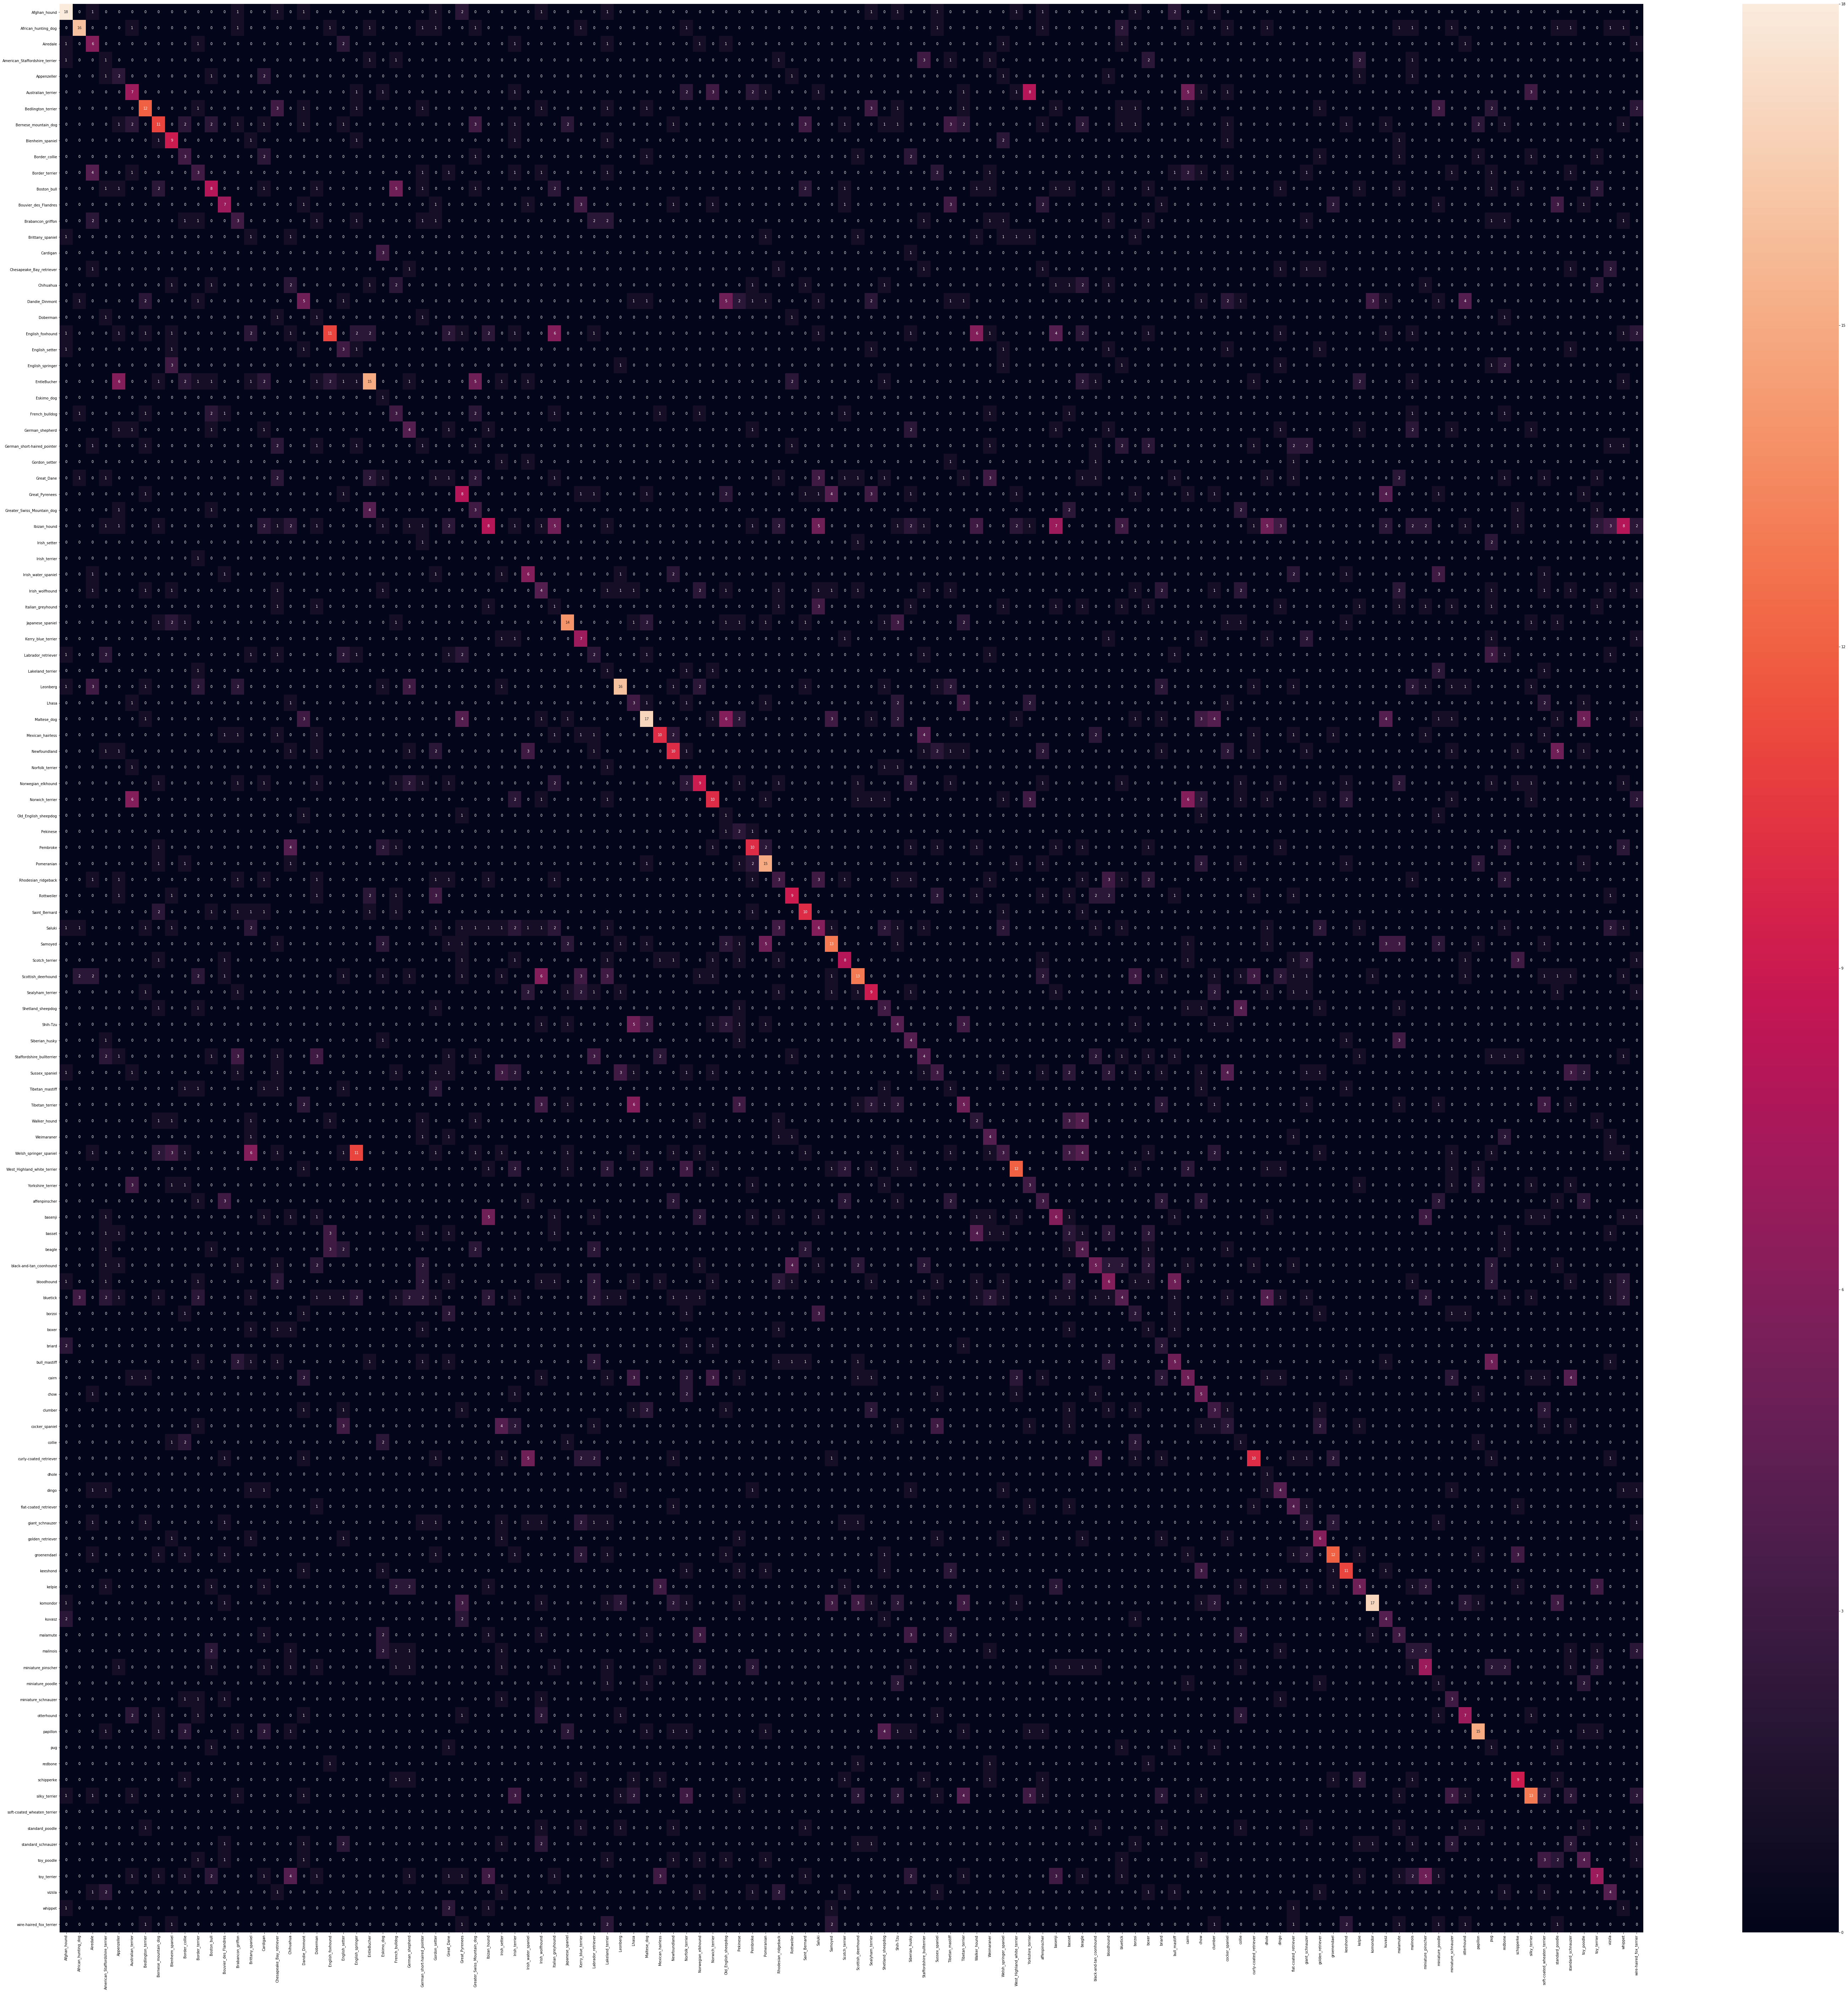

In [80]:
fig, ax = plt.subplots(figsize=(100,100))  
plot = sns.heatmap(df, annot=True)

figure = plot.get_figure()    
figure.savefig('matrix_{}.png'.format(MODEL))

In [0]:
results = pd.read_csv(file ,sep='|')

for index, row in results.iterrows():
  results.at[index,'Class'] = row["Class"].split('-', 1)[1]

In [82]:
results.head()

,Class,True Positive,False Positive,Accuracy
0,Chihuahua,2,20,9.090909
1,Japanese_spaniel,14,13,51.851852
2,Maltese_dog,17,20,45.945946
3,Pekinese,2,20,9.090909
4,Shih-Tzu,4,28,12.500000


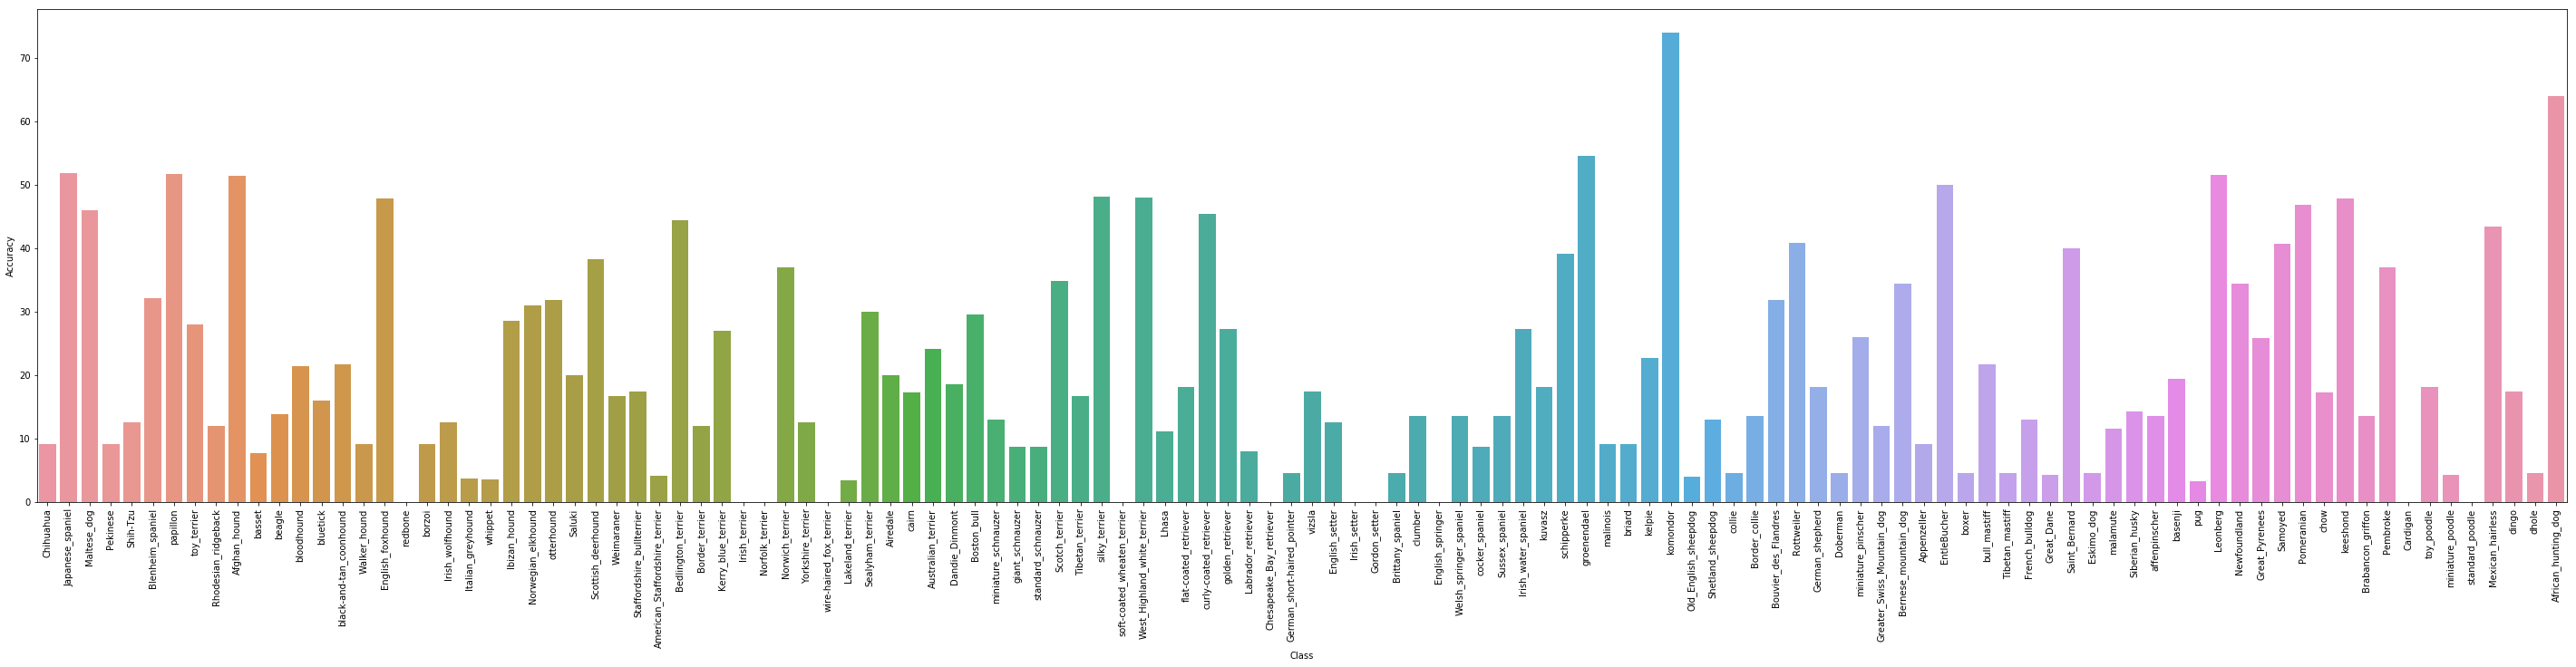

In [83]:
fig, ax = plt.subplots(figsize=(50,10)) 
plot = sns.barplot(x='Class', y='Accuracy', data=results)
for item in plot.get_xticklabels():
  item.set_rotation(90)

figure = plot.get_figure()    
figure.savefig('accuracy_{}.png'.format(MODEL))